In [ ]:
import cv2
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datathon/train_test.csv')

In [ ]:
def prepair_x(raw_x):
    x = raw_x.values.astype('float32') / 255
    return x.reshape(x.shape[0], *(50,50))
    
def prepair_y(raw_y):
    y = raw_y - 1
    return y
    
letter_x = prepair_x(data.iloc[:,1:])
letter_y = prepair_y(data.iloc[:,0].values.astype('int32'))

In [ ]:
# data = pd.read_csv(data_root)
display(data.shape)
display(data)

(80213, 2501)

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80208,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80209,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80210,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80211,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dataset = pd.read_csv(data_root).astype("float32")
# dataset.rename(columns={'0': "label"}, inplace=True)

In [ ]:
# display(dataset.shape)
# display(dataset)

(80213, 2501)

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80208,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80209,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80210,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80211,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# letter_x = dataset.drop("label", axis=1)
# letter_y = dataset["label"]

# (digit_train_x, digit_train_y), (digit_test_x, digit_test_y) = mnist.load_data()

In [ ]:
display(letter_x)

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [ ]:
# letter_x = letter_x.values

In [ ]:
# display(letter_x)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(letter_x.shape, letter_y.shape)
# print(digit_train_x.shape, digit_train_y.shape)
# print(digit_test_x.shape, digit_test_y.shape)

(80213, 50, 50) (80213,)


In [ ]:
# digit_data = np.concatenate((digit_train_x, digit_test_x))
# digit_target = np.concatenate((digit_train_y, digit_test_y))

# print(digit_data.shape, digit_target.shape)

In [ ]:
# digit_target += 36

In [ ]:
# display(digit_target)

In [ ]:
# data = []

# for flatten in letter_x:
#   image = np.reshape(flatten, (50, 50, 1))
#   data.append(image)

# letter_data = np.array(data, dtype=np.float32)
# letter_target = letter_y

In [ ]:
# digit_data = np.reshape(digit_data, (digit_data.shape[0], digit_data.shape[1], digit_data.shape[2], 1))

In [ ]:
# print(letter_data.shape, letter_target.shape)
# print(digit_data.shape, digit_target.shape)

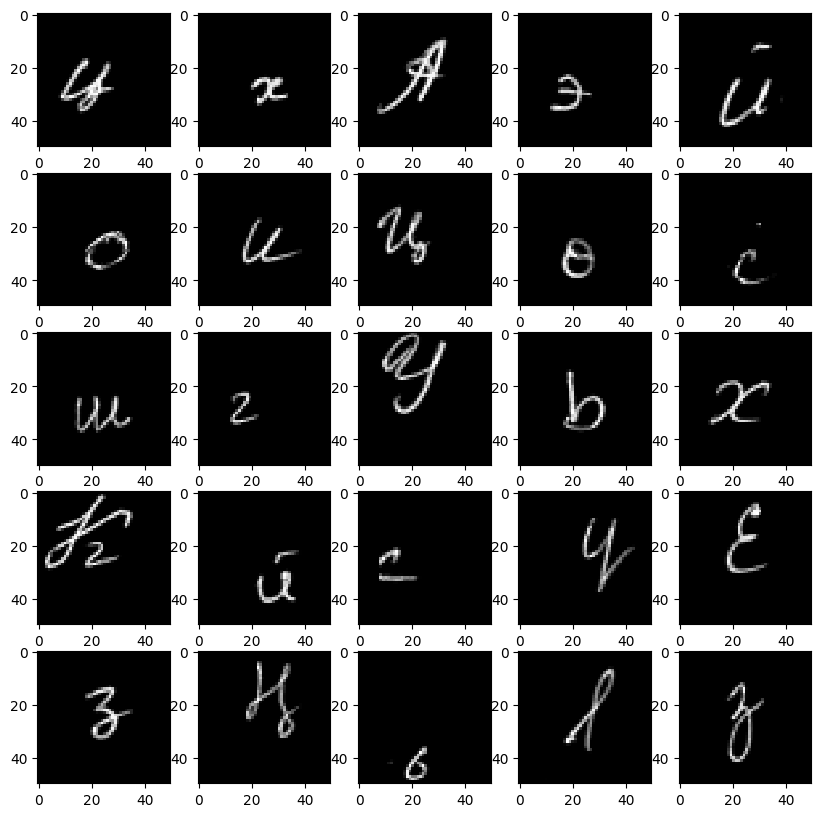

In [ ]:
shuffled_data = shuffle(letter_x)
rows, cols = 5, 5

plt.figure(figsize=(10, 10))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(50, 50), interpolation="nearest", cmap="gray")

plt.show()

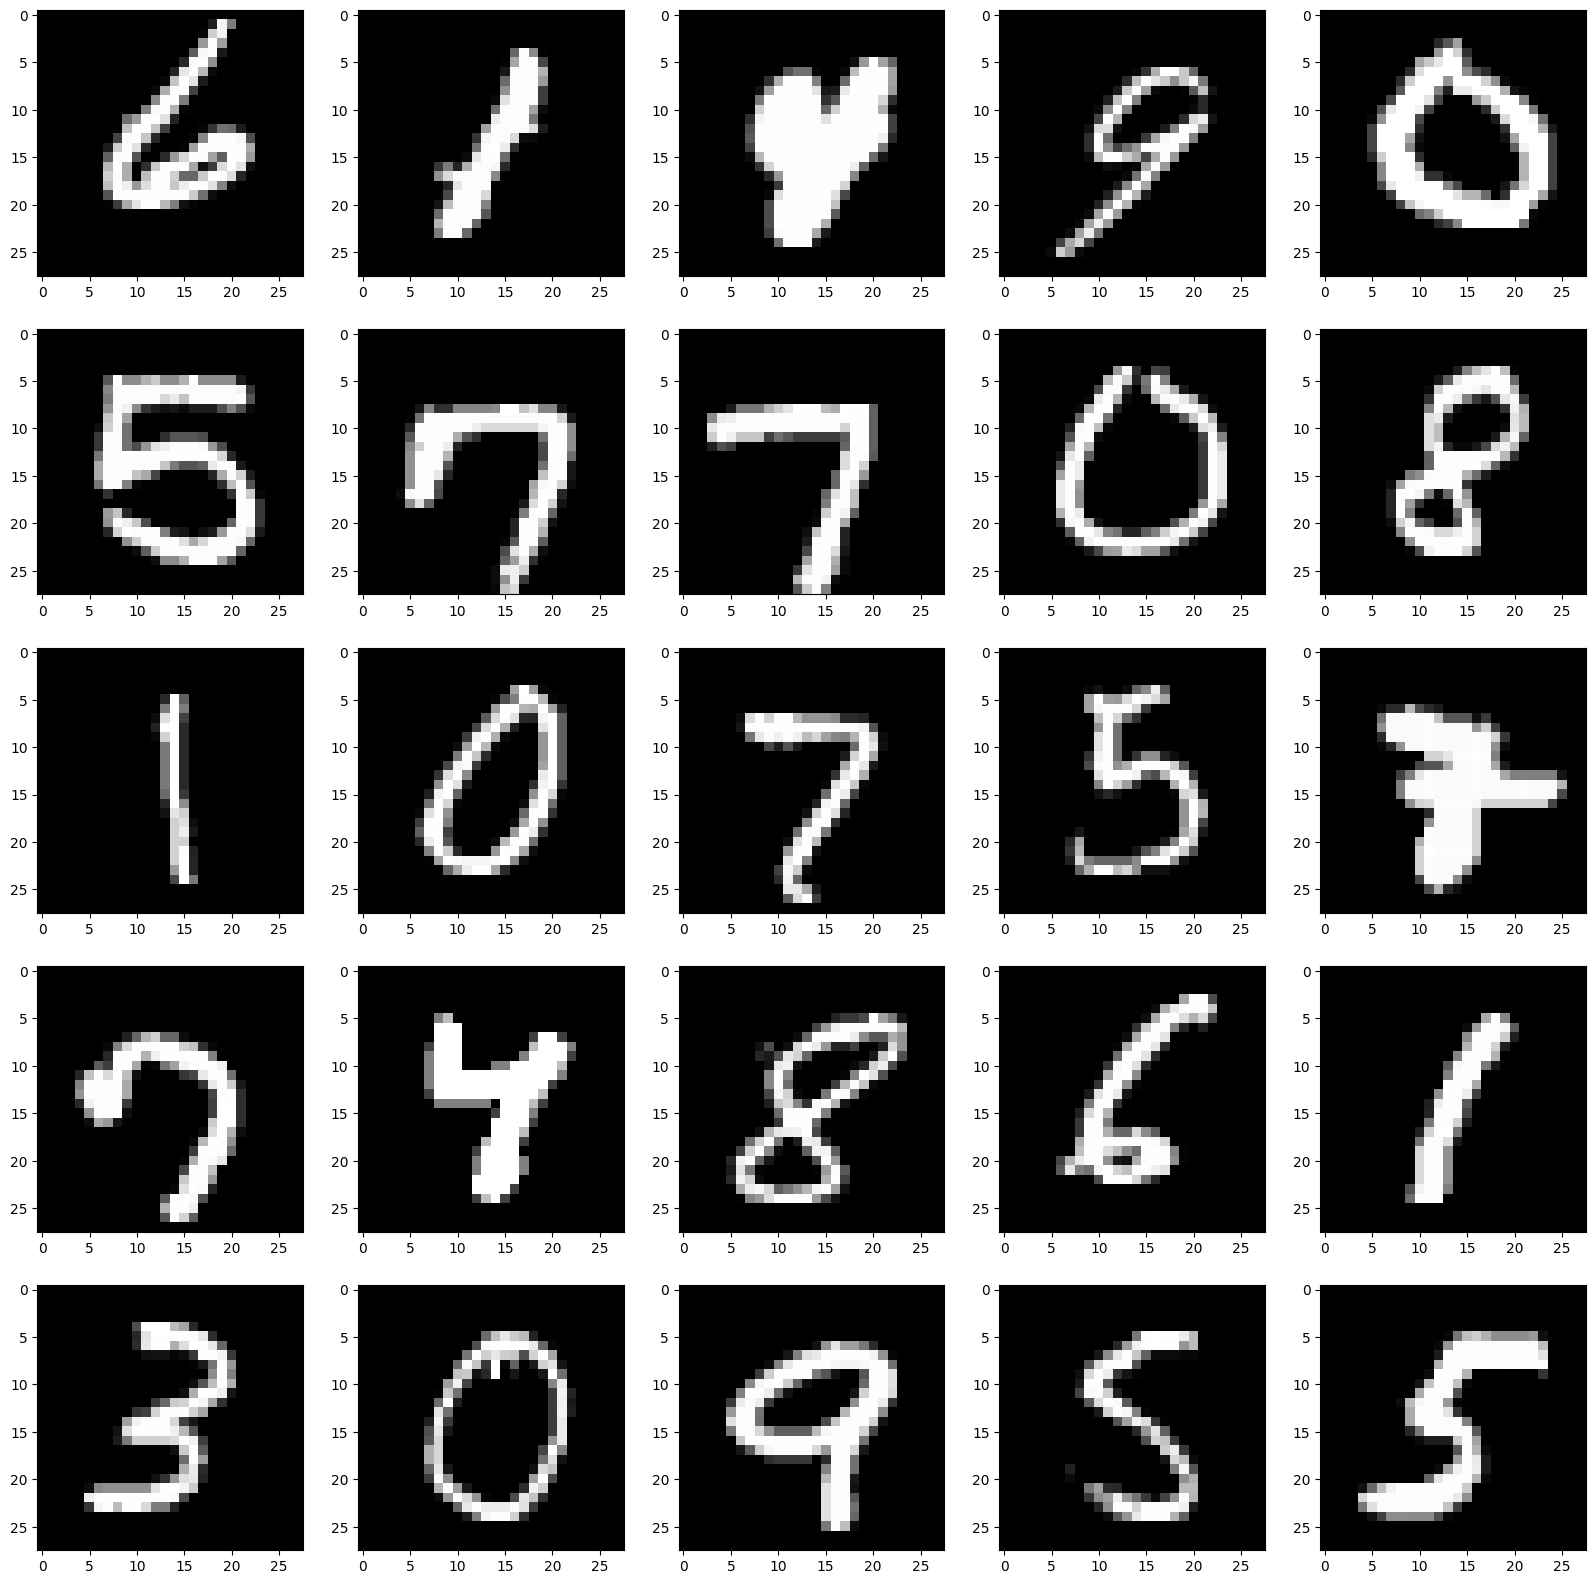

In [ ]:
# shuffled_data = shuffle(digit_data)
# rows, cols = 5, 5

# plt.figure(figsize=(20, 20))

# for i in range(rows * cols):
#   plt.subplot(cols, rows, i+1)
#   plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

# plt.show()

In [ ]:
data = letter_x # np.concatenate((digit_data, letter_data))
target =letter_y # np.concatenate((digit_target, letter_target))

print(data.shape, target.shape)

(80213, 50, 50) (80213,)


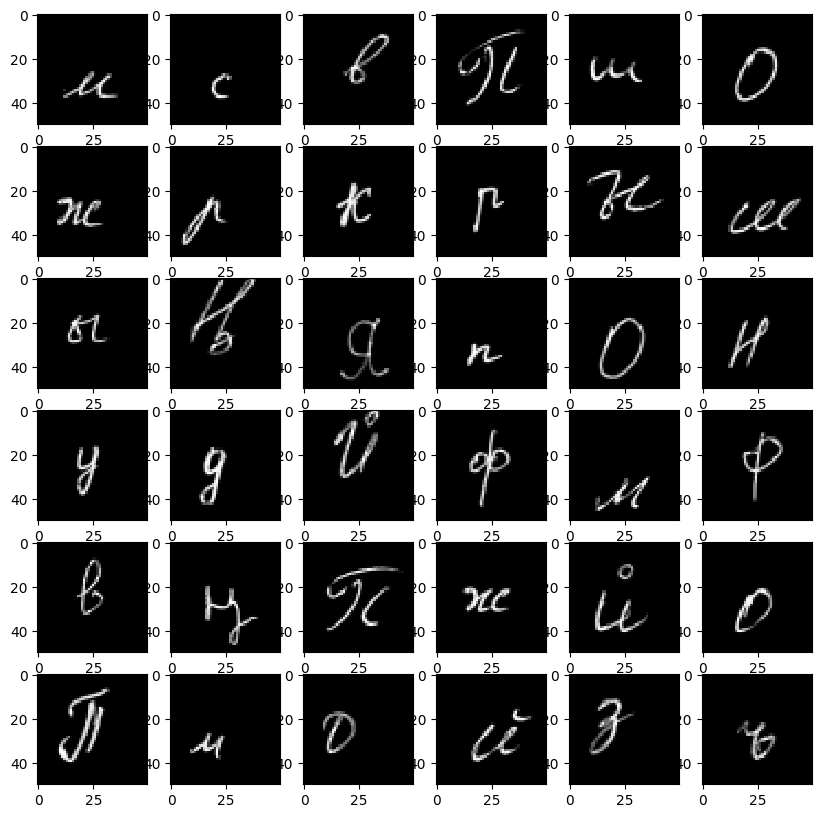

In [ ]:
shuffled_data = shuffle(data)
rows, cols = 6, 6

plt.figure(figsize=(10, 10))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(50, 50), interpolation="nearest", cmap="gray")

plt.show()

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size=0.2,random_state=1)
print(train_data.shape)
print(test_labels.shape)

(64170, 50, 50)
(16043,)


In [ ]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(64170, 50, 50) (64170,)
(16043, 50, 50) (16043,)


In [ ]:
# train_data = train_data / 255.0
# test_data = test_data / 255.0
print(train_labels.shape)
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)
print(train_labels.shape)
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

(64170,)
(64170, 36)


In [ ]:
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(64170, 50, 50, 1) (16043, 50, 50, 1)
(64170, 36) (16043, 36)


In [ ]:
print(train_data.shape)

(64170, 50, 50, 1)


In [ ]:
train_label_counts = [0 for i in range(36)]
test_label_counts = [0 for i in range(36)]

for i in range(train_data.shape[0]):
  train_label_counts[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
  test_label_counts[np.argmax(test_labels[i])] += 1

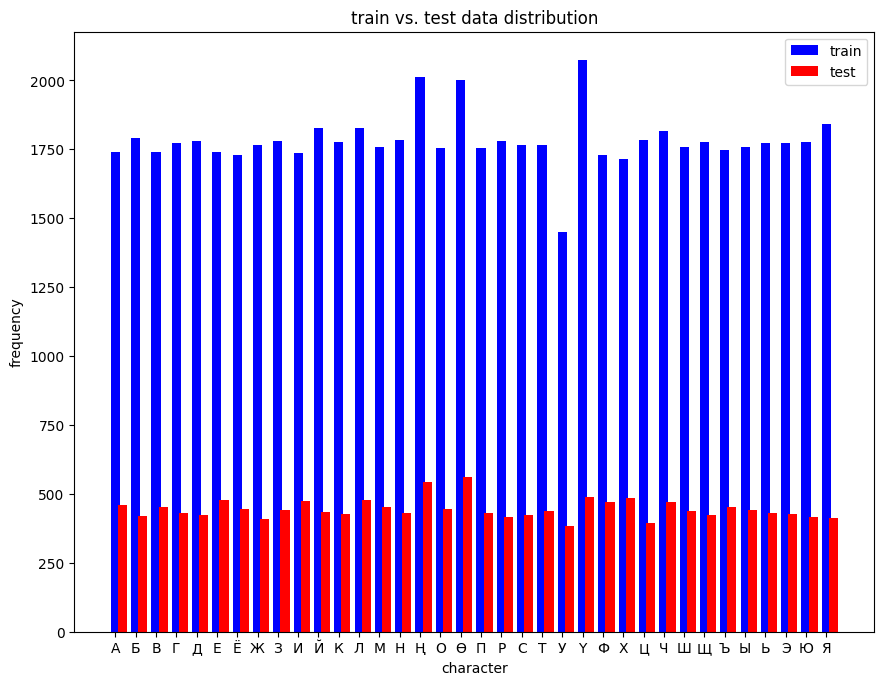

In [ ]:
frequency = [
    train_label_counts, test_label_counts
] 

fig =  plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
x = ['А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'Ң','О','Ө', 'П', 'Р', 'С', 'Т', 'У', 'Ү', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я']

plt.xticks(range(len(frequency[0])), x)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.45)
ax.bar(np.arange(len(frequency[1])) + 0.35, frequency[1], color="r", width=0.45)
ax.legend(labels=["train", "test"])

In [ ]:
# np.save("/content/drive/MyDrive/htr/train_data", train_data)
# np.save("../numpy/train_labels", train_labels)
# np.save("../numpy/test_data", test_data)
# np.save("../numpy/test_labels", test_labels)

In [ ]:
np.save("/content/drive/MyDrive/htr/numpykg/train_data", train_data)
np.save("/content/drive/MyDrive/htr/numpykg/train_labels", train_labels)
np.save("/content/drive/MyDrive/htr//numpykg/test_data", test_data)
np.save("/content/drive/MyDrive/htr/numpykg/test_labels", test_labels)